## Predicting penguins species


## Environment setup

1. Added `getpass` prompt so you can add your apps Uplink key
2. Install the `anvil-uplink` library
3. Import the `anvil.server` package
4. Connect the notebook using your apps Uplink key
5. Create a function to call from your app that includes the `anvil.server.callable` decorator
6. Add `anvil.server.wait_forever()` to the end of the notebook

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

**Enter the Uplink Key from Anvil Web App**

In [ ]:
from getpass import getpass
uplink_key = getpass('Enter your Uplink key: ')

Enter your Uplink key: ··········


**Install anvil-uplink library**

In [ ]:
!pip install anvil-uplink

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.1/90.1 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.4/51.4 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ws4py: filename=ws4py-0.5.1-py3-none-any.whl size=45228 sha256=7d8ff8bbdbc2ce45e5a8485c99dfa93384cf27f722bda230b54d1308ad3acfb3
  Stored in directory: /root/.cache/pip/wheels/2e/7c/ad/d9c746276bf024d44296340869fcb169f1e5d80fb147351a57
Successfully built ws4py


**Import the anvil.server Package**

In [ ]:
import anvil.server

**Connect the Notebook to your application via Uplink Key**

In [ ]:
anvil.server.connect(uplink_key)

Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default Environment" as SERVER


## loading the dataset

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
penguins = pd.read_csv("//content/drive/MyDrive/Colab Notebooks/Demo/penguins_size.csv")
penguins.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,MALE
1,Adelie,Torgersen,39.5,17.4,186,3800,FEMALE
2,Adelie,Torgersen,40.3,18.0,195,3250,FEMALE
3,Adelie,Torgersen,36.7,19.3,193,3450,FEMALE
4,Adelie,Torgersen,39.3,20.6,190,3650,MALE


## preview of dataset

In [ ]:
penguins

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,MALE
1,Adelie,Torgersen,39.5,17.4,186,3800,FEMALE
2,Adelie,Torgersen,40.3,18.0,195,3250,FEMALE
3,Adelie,Torgersen,36.7,19.3,193,3450,FEMALE
4,Adelie,Torgersen,39.3,20.6,190,3650,MALE
...,...,...,...,...,...,...,...
337,Gentoo,Biscoe,47.2,13.7,214,4925,FEMALE
338,Gentoo,Biscoe,46.8,14.3,215,4850,FEMALE
339,Gentoo,Biscoe,50.4,15.7,222,5750,MALE
340,Gentoo,Biscoe,45.2,14.8,212,5200,FEMALE


In [ ]:
penguins.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [ ]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            342 non-null    object 
 1   island             342 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    int64  
 5   body_mass_g        342 non-null    int64  
 6   sex                334 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 18.8+ KB


## Description of class

In [ ]:
print(penguins.groupby('species').size())

species
Adelie       151
Chinstrap     68
Gentoo       123
dtype: int64


## Dataset visualization

<Axes: >

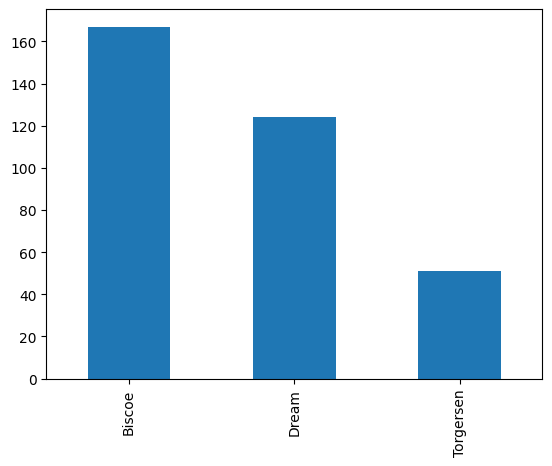

In [ ]:
penguins.island.value_counts().plot(kind='bar')

In [ ]:
penguins.sex.value_counts()

MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64

## Mean of features with different species, island and sex

In [ ]:
penguins.groupby('species').mean()

<ipython-input-14-8ea08f3063ed>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  penguins.groupby('species').mean()


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
species,,,,
Adelie,38.791391,18.346358,189.953642,3700.662252
Chinstrap,48.833824,18.420588,195.823529,3733.088235
Gentoo,47.504878,14.982114,217.186992,5076.016260


In [ ]:
penguins.groupby('island').mean()

<ipython-input-15-eb7471ee5fe7>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  penguins.groupby('island').mean()


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
island,,,,
Biscoe,45.257485,15.874850,209.706587,4716.017964
Dream,44.167742,18.344355,193.072581,3712.903226
Torgersen,38.950980,18.429412,191.196078,3706.372549


In [ ]:
penguins.groupby('sex').mean()

<ipython-input-16-efe0dcf37dd9>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  penguins.groupby('sex').mean()


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
sex,,,,
.,44.500000,15.700000,217.000000,4875.000000
FEMALE,42.096970,16.425455,197.363636,3862.272727
MALE,45.854762,17.891071,204.505952,4545.684524


## Train and validate dataset

In [ ]:
from sklearn.preprocessing import LabelEncoder
X0=penguins[['culmen_length_mm', 'flipper_length_mm', 'body_mass_g', 'culmen_depth_mm']]
Y=penguins[['species']]
Z=penguins[['island','sex']]

In [ ]:
z2=Z.apply(LabelEncoder().fit_transform)

In [ ]:
X=pd.concat([X0,z2], axis=1)

In [ ]:
X

,culmen_length_mm,flipper_length_mm,body_mass_g,culmen_depth_mm,island,sex
0,39.1,181,3750,18.7,2,2
1,39.5,186,3800,17.4,2,1
2,40.3,195,3250,18.0,2,1
3,36.7,193,3450,19.3,2,1
4,39.3,190,3650,20.6,2,2
...,...,...,...,...,...,...
337,47.2,214,4925,13.7,0,1
338,46.8,215,4850,14.3,0,1
339,50.4,222,5750,15.7,0,2
340,45.2,212,5200,14.8,0,1


In [ ]:
df = pd.DataFrame(X)

In [ ]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/Demo/Penguin_size_updated.csv', index=False)

## Train- Test splitting

In [ ]:
from sklearn.model_selection import train_test_split
# splitting dataset- keeping 75% for training and 25% for testing
x_train_set, x_test_set, y_train_set, y_test_set = train_test_split(X, Y, test_size=0.25, random_state=42)

In [ ]:
print("rows in train set :",len(y_train_set))
print("rows in test set :",len(y_test_set))

rows in train set : 256
rows in test set : 86


In [ ]:
y_train_set

,species
24,Adelie
323,Gentoo
143,Adelie
208,Chinstrap
253,Gentoo
...,...
188,Chinstrap
71,Adelie
106,Adelie
270,Gentoo


## label encoding species (prediction labels)

In [ ]:
y1=y_train_set.apply(LabelEncoder().fit_transform)
y2=y_test_set.apply(LabelEncoder().fit_transform)

## Scaling the dataset using StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler
std= StandardScaler()
x_new_train= std.fit_transform(x_train_set)
x_new_test= std.fit_transform(x_test_set)

In [ ]:
x_train_set

,culmen_length_mm,flipper_length_mm,body_mass_g,culmen_depth_mm,island,sex
24,35.3,187,3800,18.9,0,1
323,47.3,216,4725,13.8,0,3
143,37.3,192,3000,16.8,1,1
208,49.3,203,4050,19.9,1,2
253,49.1,220,5150,14.8,0,1
...,...,...,...,...,...,...
188,52.0,210,4800,20.7,1,2
71,39.6,196,3550,17.2,2,1
106,38.2,190,3900,20.0,0,2
270,48.5,220,5300,14.1,0,2


In [ ]:
x_new_train

array([[-1.60934489, -1.01837104, -0.51775888,  0.89949208, -0.91701715,
        -0.94672926],
       [ 0.59078305,  1.07475925,  0.6588755 , -1.65794881, -0.91701715,
         2.72543273],
       [-1.2426569 , -0.65748651, -1.53538861, -0.15357182,  0.51442426,
        -0.94672926],
       ...,
       [-1.07764731, -0.80184032, -0.39055516,  1.45109698, -0.91701715,
         0.88935173],
       [ 0.81079585,  1.36346687,  1.39029687, -1.50751111, -0.91701715,
         0.88935173],
       [-1.1509849 , -0.80184032,  0.05465785,  1.45109698, -0.91701715,
         0.88935173]])

## Training the model / selecting desired model for predictions

In [ ]:
# Predict a value by validation using test set
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
KNC = KNeighborsClassifier()
KNC.fit(x_new_train, y1.values.ravel())
predictions = KNC.predict(x_new_test)
print(accuracy_score(y2, predictions))
print(confusion_matrix(y2, predictions))
print(classification_report(y2, predictions))

1.0
[[44  0  0]
 [ 0 13  0]
 [ 0  0 29]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        29

    accuracy                           1.00        86
   macro avg       1.00      1.00      1.00        86
weighted avg       1.00      1.00      1.00        86



In [ ]:
predictions

array([2, 0, 0, 0, 0, 2, 1, 1, 2, 0, 0, 2, 2, 2, 0, 1, 0, 0, 1, 0, 1, 0,
       2, 0, 0, 0, 0, 1, 0, 2, 1, 0, 0, 2, 0, 0, 1, 2, 0, 0, 0, 0, 2, 2,
       0, 1, 2, 2, 0, 0, 2, 1, 2, 0, 0, 1, 0, 2, 2, 0, 2, 2, 2, 2, 1, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 1, 2, 0, 0, 2, 0, 2, 0, 0])

## Testing the new data

In [ ]:
species=["Adelie","Chinstrap","Gentoo"]

In [ ]:
mean =np.array([[43.920930, 200.936047,4201.090116,17.143605,0.662791,1.508721]])
std =np.array([[5.450030, 14.042064, 802.213531, 1.978342, 0.726194, 0.506442]])
stxnew=np.array([[]])
i=0
X_new = np.array([[50.9, 196, 3550, 19.1 , 0, 1]])
for v in X_new:
    ct=(v-mean)/std
    stxnew=ct
    print(stxnew)
    if i==6:
        break
p=KNC.predict(stxnew)

[[ 1.28055625 -0.35151862 -0.81161697  0.98890637 -0.91269137 -1.00450002]]


## Validating the prediction

In [ ]:
print(species[int(p)])

Chinstrap


In [ ]:
@anvil.server.callable
def predict_pen(val1,val2,val3,val4,val5,val6):
  mean =np.array([[43.920930, 200.936047,4201.090116,17.143605,0.662791,1.508721]])
  std =np.array([[5.450030, 14.042064, 802.213531, 1.978342, 0.726194, 0.506442]])
  stxnew=np.array([[]])
  i=0
  X_new = np.array([[val1,val2,val3,val4,val5,val6]])
  for v in X_new:
    ct=(v-mean)/std
    stxnew=ct
    if i==6:
        break
  p=KNC.predict(stxnew)
  return species[int(p)]

In [ ]:
predict_pen(50.9,196,3550,19.1,1,0)

'Chinstrap'

In [ ]:
anvil.server.wait_forever()

KeyboardInterrupt: ignored

In [ ]:
!pip freeze requirements.txt

absl-py==1.4.0
aiohttp==3.8.5
aiosignal==1.3.1
alabaster==0.7.13
albumentations==1.3.1
altair==4.2.2
anvil-uplink==0.4.2
anyio==3.7.1
appdirs==1.4.4
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array-record==0.4.1
arviz==0.15.1
astropy==5.3.4
astunparse==1.6.3
async-timeout==4.0.3
attrs==23.1.0
audioread==3.0.1
autograd==1.6.2
Babel==2.13.0
backcall==0.2.0
beautifulsoup4==4.11.2
bleach==6.0.0
blinker==1.4
blis==0.7.11
blosc2==2.0.0
bokeh==3.2.2
bqplot==0.12.40
branca==0.6.0
build==1.0.3
CacheControl==0.13.1
cachetools==5.3.1
catalogue==2.0.10
certifi==2023.7.22
cffi==1.16.0
chardet==5.2.0
charset-normalizer==3.3.0
chex==0.1.7
click==8.1.7
click-plugins==1.1.1
cligj==0.7.2
cloudpickle==2.2.1
cmake==3.27.6
cmdstanpy==1.2.0
colorcet==3.0.1
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection==0.1.3
cons==0.4.6
contextlib2==21.6.0
contourpy==1.1.1
convertdate==2.4.0
cryptography==41.0.4
cufflinks==0.17.3
cvxopt==1.3.2
cvxpy==1.3.2
cycler==0.12.0
cymem==2.0.8
Cython==3.0.2
dask